###향후 판매량 예측

In [1]:
import pandas as pd # 판다스 임포트

# 데이터 경로
data_path = '/Users/suhyeon/ML/competitive-data-science-predict-future-sales/'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
items_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')   # 테스트 데이터
submission = pd.read_csv(data_path + 'sample_submission.csv') # 제출 샘플 데이터

In [2]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
sales_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [4]:
train = sales_train.merge(shops, on='shop_id', how='left')
train = train.merge(items, on='item_id', how = 'left')
train = train.merge(items_categories, on='item_category_id', how='left')

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [5]:
import pandas as pd

def resumetable(df): 
    print(f'데이터 셋 형상: {df.shape}') #데이터 크키 출력
    
    
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'}) #컬럼명을 인덱스에 피처로 변경

    summary['결측값 개수'] = df.isnull().sum().values

    summary['고윳값 개수'] = df.nunique().values

    summary['첫 번째 값'] = df.iloc[0].values #미리보기
    summary['두 번째 값'] = df.iloc[1].values

    return summary
resumetable(train)

데이터 셋 형상: (2935849, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


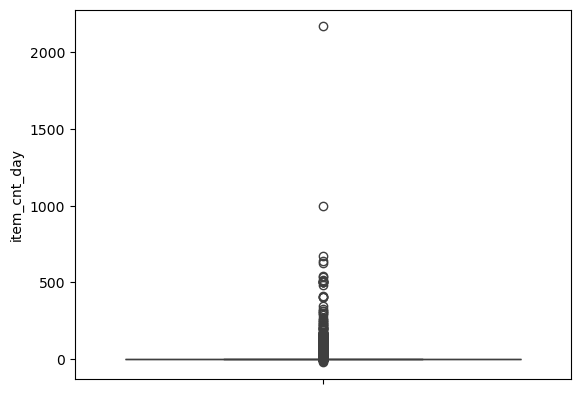

In [6]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(y='item_cnt_day', data=train);
plt.show()

In [7]:
sns.boxplot(y='item_price', data=train);

In [8]:
group = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'}) 
group.reset_index() #데이터를 월 단위 나누 상품 판매량 합계

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


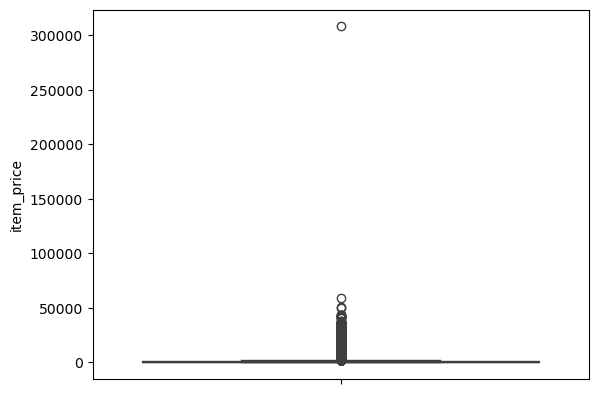

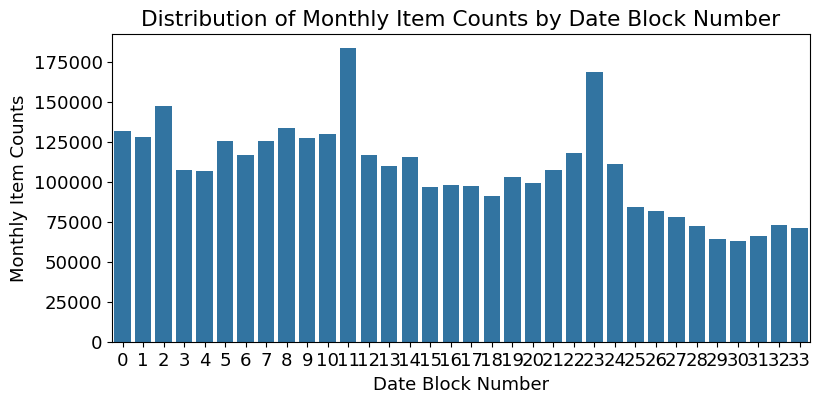

In [9]:
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(9, 4)

# 월별 총 상품 판매량 계산
group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group_month_sum = group_month_sum.reset_index()

# 시각화
sns.barplot(x='date_block_num', y='item_cnt_day', data=group_month_sum)

# 그래프 제목 및 축 라벨 설정
ax.set(
    title='Distribution of Monthly Item Counts by Date Block Number',
    xlabel='Date Block Number',
    ylabel='Monthly Item Counts');
plt.show()

In [10]:
train['item_category_id'].nunique()

84

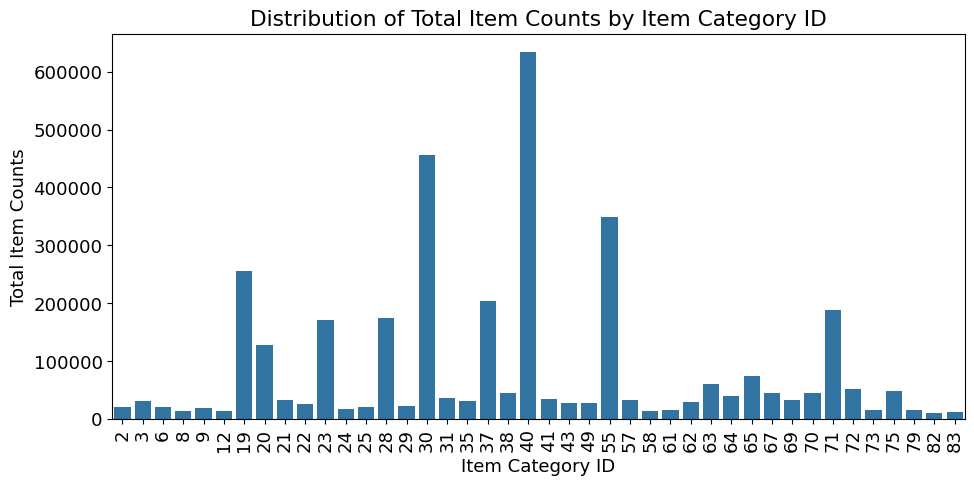

In [11]:
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

# 상품 분류별 총 상품 판매량 계산
group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day': 'sum'})
group_cat_sum = group_cat_sum.reset_index()

# 10,000개 이상 판매된 상품 분류 필터링
group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day'] > 10000]

# 상품분류별 총 상품 판매량 막대 그래프
sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum)
ax.set(title='Distribution of Total Item Counts by Item Category ID',
       xlabel='Item Category ID',
       ylabel='Total Item Counts')

# x축 라벨 회전
ax.tick_params(axis='x', labelrotation=90)

plt.show()

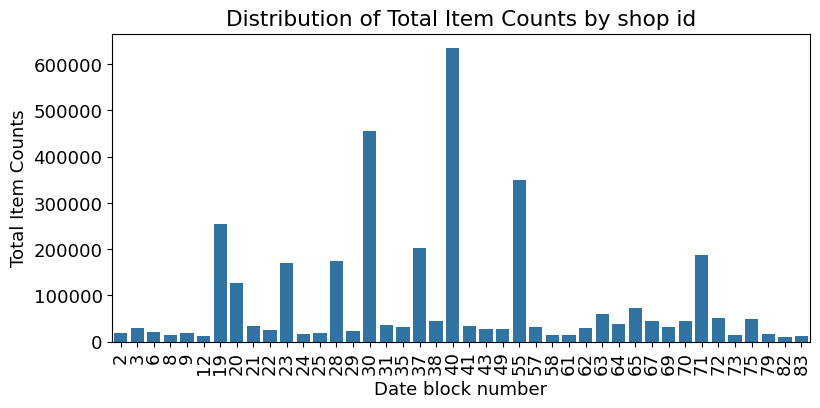

In [12]:
figure, ax = plt.subplots()
figure.set_size_inches(9, 4)

group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day' : 'sum'})
group_shop_sum = group_shop_sum.reset_index()

group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_day']>10000]

sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum)
ax.set(title='Distribution of Total Item Counts by shop id',
       xlabel='Date block number',
       ylabel='Total Item Counts')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [13]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')  # 경고 문구 생략

data_path = '/Users/suhyeon/ML/competitive-data-science-predict-future-sales/'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
items_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [14]:
#피처명 한글화
sales_train = sales_train.rename(columns={'date':'날짜',
                                         'date_block_num':'월ID',
                                         'shop_id': '상점ID',
                                         'item_id': '상품ID',
                                         'item_price': '판매',
                                         'item_cnt_day': '판매량'})
sales_train.head()

,날짜,월ID,상점ID,상품ID,판매,판매량
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [15]:
shops = shops.rename(columns={'shop_name': '상점명',
                              'shop_id': '상점ID'})
shops.head()  

,상점명,상점ID
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [16]:
items = items.rename(columns={'item_name': '상품명',
                              'item_id': '상품ID',
                              'item_category_id': '상품분류ID'})
items.head()

,상품명,상품ID,상품분류ID
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [17]:
item_categories = items_categories.rename(columns={'item_category_name': '상품분류명',
                                                   'item_category_id': '상품분류ID'})
item_categories.head()

,상품분류명,상품분류ID
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [18]:
test = test.rename(columns={'shop_id': '상점ID',
                           'item_id': '상품ID'})
test.head()

,ID,상점ID,상품ID
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [19]:
#다운캐스팅
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2  # 메모리 사용량(MB) 초기값

    for col in df.columns:
        dtype_name = df[col].dtype.name  # 컬럼의 데이터 타입 확인

        if dtype_name == 'object':
            # 문자열 타입은 변환하지 않음
            continue
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')  # Boolean은 int8로 변환
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            # 정수형 또는 실수지만 소수점이 없는 경우
            df[col] = pd.to_numeric(df[col], downcast='integer')  # 정수형으로 다운캐스팅
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')  # 실수형으로 다운캐스팅

    end_mem = df.memory_usage().sum() / 1024**2  # 변환 후 메모리 사용량(MB)
    
    if verbose:
        print("메모리 사용량 감소: {:.2f}%".format(100 * (start_mem - end_mem) / start_mem))

    return df
all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

메모리 사용량 감소: 54.17%
메모리 사용량 감소: 38.46%
메모리 사용량 감소: 54.15%
메모리 사용량 감소: 39.84%
메모리 사용량 감소: 70.83%


In [20]:
#데이터 조합 생성
from itertools import product

train = []
# 월ID, 상점ID, 상품ID의 조합 생성
for i in sales_train['월ID'].unique():
    all_shops = sales_train.loc[sales_train['월ID'] == i, '상점ID'].unique()
    all_items = sales_train.loc[sales_train['월ID'] == i, '상품ID'].unique()
    train.append(np.array(list(product([i], all_shops, all_items))))

# DataFrame으로 변환
idx_features = ['월ID', '상점ID', '상품ID']
train_df = pd.DataFrame(np.vstack(train), columns=idx_features)

train_df.head()  # 결과 확인

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564


In [21]:
group= sales_train.groupby(idx_features).agg({'판매량': 'sum'})

group = group.reset_index()

group= group.rename(columns={'판매량':'월간 판매량'})
group

,월ID,상점ID,상품ID,월간 판매량
0,0,0,32,6
1,0,0,33,3
2,0,0,35,1
3,0,0,43,1
4,0,0,51,2
...,...,...,...,...
1609119,33,59,22087,6
1609120,33,59,22088,2
1609121,33,59,22091,1
1609122,33,59,22100,1


In [22]:
from itertools import product
import numpy as np
import pandas as pd

# 월ID, 상점ID, 상품ID의 모든 조합 생성
train = []
idx_features = ['월ID', '상점ID', '상품ID']  # 병합 기준 피처 설정

for i in sales_train['월ID'].unique(): #월ID마다 반복해서 데이터 생성
    all_shop = sales_train.loc[sales_train['월ID'] == i, '상점ID'].unique()
    all_item = sales_train.loc[sales_train['월ID'] == i, '상품ID'].unique()
    train.append(np.array(list(product([i], all_shop, all_item)))) 
    #그 월의 모든 상점과 모든 상품을 서로 조합하여 가능한 모든 경우 생성

# 리스트를 DataFrame으로 변환
train = pd.DataFrame(np.vstack(train), columns=idx_features)

# 그룹화하여 판매량 집계
group = sales_train.groupby(idx_features).agg({'판매량': 'sum'}).reset_index()

# 병합
train = train.merge(group, on=idx_features, how='left')
train  # 결과 확인

,월ID,상점ID,상품ID,판매량
0,0,59,22154,1.0
1,0,59,2552,NaN
2,0,59,2554,NaN
3,0,59,2555,NaN
4,0,59,2564,NaN
...,...,...,...,...
10913845,33,21,7635,NaN
10913846,33,21,7638,NaN
10913847,33,21,7640,NaN
10913848,33,21,7632,NaN


In [42]:
test['월ID'] = 34
all_data = pd.concat([train, test.drop('ID', axis=1)],
                     ignore_index=True,
                     keys=idx_features)
all_data = all_data.fillna(0) #결측값을 0으로 대체

all_data

,월ID,상점ID,상품ID,판매량
0,0,59,22154,1.0
1,0,59,2552,0.0
2,0,59,2554,0.0
3,0,59,2555,0.0
4,0,59,2564,0.0
...,...,...,...,...
11128045,34,45,18454,0.0
11128046,34,45,16188,0.0
11128047,34,45,15757,0.0
11128048,34,45,19648,0.0


In [80]:
test['월ID'] = 34
all_data = pd.concat([train, test.drop('ID', axis=1)], ignore_index=True)
all_data = all_data.fillna(0)

all_data.head()

,월ID,상점ID,상품ID,판매량,shop_id,item_id
0,0,59.0,22154.0,1.0,0.0,0.0
1,0,59.0,2552.0,0.0,0.0,0.0
2,0,59.0,2554.0,0.0,0.0,0.0
3,0,59.0,2555.0,0.0,0.0,0.0
4,0,59.0,2564.0,0.0,0.0,0.0


In [77]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')  # 경고 문구 생략

data_path = '/Users/suhyeon/ML/competitive-data-science-predict-future-sales/'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
items_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

shops = shops.rename(columns={'shop_name': '상점명',
                              'shop_id': '상점ID'})
shops.head()

,상점명,상점ID
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [86]:
all_data = all_data.merge(shops, on='상점ID', how='left')
all_data.head()

,월ID,상점ID,상품ID,판매량,shop_id,item_id,상점명_x,상점명_y,상점명
0,0,59.0,22154.0,1.0,0.0,0.0,"Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир"""
1,0,59.0,2552.0,0.0,0.0,0.0,"Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир"""
2,0,59.0,2554.0,0.0,0.0,0.0,"Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир"""
3,0,59.0,2555.0,0.0,0.0,0.0,"Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир"""
4,0,59.0,2564.0,0.0,0.0,0.0,"Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир"""


In [91]:
# 훈련 데이터: 월ID가 32인 경우
X_train = all_data[all_data['월ID'] == 32].drop(['판매량'], axis=1)
y_train = all_data[all_data['월ID'] == 32]['판매량']

# 검증 데이터: 월ID가 33인 경우
X_valid = all_data[all_data['월ID'] == 33].drop(['판매량'], axis=1)
y_valid = all_data[all_data['월ID'] == 33]['판매량']

# 테스트 데이터: 월ID가 34인 경우 (타깃 값은 없으므로 피처만 사용)
X_test = all_data[all_data['월ID'] == 34].drop(['판매량'], axis=1)

print("X_train 월ID unique:", X_train['월ID'].unique())
print("X_valid 월ID unique:", X_valid['월ID'].unique())
print("X_test 월ID unique:", X_test['월ID'].unique())

X_train 월ID unique: [32]
X_valid 월ID unique: [33]
X_test 월ID unique: [34]


In [104]:
import lightgbm as lgb

cat_features = ['상점ID']
for cat_feature in cat_features:
    all_data[cat_feature] = all_data[cat_feature].astype('category')
cols_to_drop = ['상점명_x', '상점명_y', '상점명']
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_valid = X_valid.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')

# 이후 LightGBM 데이터셋 생성 및 학습
dtrain = lgb.Dataset(X_train, y_train, categorical_feature=cat_features)
dvalid = lgb.Dataset(X_valid, y_valid, categorical_feature=cat_features)

lgb_model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=500,
    valid_sets=[dtrain, dvalid]
)

In [106]:
preds = lgb_model.predict(X_test).clip(0, 20)

In [107]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

data_path = '/Users/suhyeon/ML/competitive-data-science-predict-future-sales/'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
items_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')   # 테스트 데이터
submission = pd.read_csv(data_path + 'sample_submission.csv') # 제출 샘플 데이터

In [112]:
sales_train = sales_train.rename(columns={'date':'날짜',
                                         'date_block_num':'월ID',
                                         'shop_id': '상점ID',
                                         'item_id': '상품ID',
                                         'item_price': '판매가',
                                         'item_cnt_day': '판매량'})
shops = shops.rename(columns={'shop_name': '상점명',
                              'shop_id': '상점ID'})
items = items.rename(columns={'item_name': '상품명',
                              'item_id': '상품ID',
                              'item_category_id': '상품분류ID'})
item_categories = items_categories.rename(columns={'item_category_name': '상품분류명',
                                                   'item_category_id': '상품분류ID'})
test = test.rename(columns={'shop_id': '상점ID',
                           'item_id': '상품ID'})

In [109]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2  # 메모리 사용량(MB) 초기값

    for col in df.columns:
        dtype_name = df[col].dtype.name  # 컬럼의 데이터 타입 확인

        if dtype_name == 'object':
            # 문자열 타입은 변환하지 않음
            continue
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')  # Boolean은 int8로 변환
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            # 정수형 또는 실수지만 소수점이 없는 경우
            df[col] = pd.to_numeric(df[col], downcast='integer')  # 정수형으로 다운캐스팅
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')  # 실수형으로 다운캐스팅

    end_mem = df.memory_usage().sum() / 1024**2  # 변환 후 메모리 사용량(MB)
    
    if verbose:
        print("메모리 사용량 감소: {:.2f}%".format(100 * (start_mem - end_mem) / start_mem))

    return df
all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

메모리 사용량 감소: 54.17%
메모리 사용량 감소: 38.46%
메모리 사용량 감소: 54.15%
메모리 사용량 감소: 39.84%
메모리 사용량 감소: 70.83%


In [116]:
sales_train = sales_train[sales_train['판매'] > 0]
sales_train = sales_train[sales_train['판매'] < 50000]
sales_train = sales_train[sales_train['판매량'] > 0]
sales_train = sales_train[sales_train['판매량'] < 50000]

print(shops['상점명'][0], '::', shops['상점명'][57])
print(shops['상점명'][1], '::', shops['상점명'][58])
print(shops['상점명'][10], '::', shops['상점명'][11])
print(shops['상점명'][39], '::', shops['상점명'][40])

!Якутск Орджоникидзе, 56 фран :: Якутск Орджоникидзе, 56
!Якутск ТЦ "Центральный" фран :: Якутск ТЦ "Центральный"
Жуковский ул. Чкалова 39м? :: Жуковский ул. Чкалова 39м²
РостовНаДону ТРК "Мегацентр Горизонт" :: РостовНаДону ТРК "Мегацентр Горизонт" Островной


In [115]:
sales_train.loc = sales_train[sales_train['판매'] > 0]
sales_train = sales_train[sales_train['판매'] < 50000]
sales_train = sales_train[sales_train['판매량'] > 0]
sales_train = sales_train[sales_train['판매량'] < 50000]

print(shops['상점명'][0], '::', shops['상점명'][57])
print(shops['상점명'][1], '::', shops['상점명'][58])
print(shops['상점명'][10], '::', shops['상점명'][11])
print(shops['상점명'][39], '::', shops['상점명'][40])

                 날짜  월ID  상점ID   상품ID       판매  판매량
0        02.01.2013    0    59  22154   999.00    1
1        03.01.2013    0    25   2552   899.00    1
2        05.01.2013    0    25   2552   899.00   -1
3        06.01.2013    0    25   2554  1709.05    1
4        15.01.2013    0    25   2555  1099.00    1
...             ...  ...   ...    ...      ...  ...
2935844  10.10.2015   33    25   7409   299.00    1
2935845  09.10.2015   33    25   7460   299.00    1
2935846  14.10.2015   33    25   7459   349.00    1
2935847  22.10.2015   33    25   7440   299.00    1
2935848  03.10.2015   33    25   7460   299.00    1

[2935849 rows x 6 columns]


In [118]:
sales_train.loc[sales_train['상점ID'] ==0, '상점ID'] = 57
sales_train.loc[sales_train['상점ID'] ==1, '상점ID'] = 58
sales_train.loc[sales_train['상점ID'] ==10, '상점ID'] = 11
sales_train.loc[sales_train['상점ID'] ==39, '상점ID'] = 40

test.loc[test['상점ID'] == 0, '상점ID'] = 57
test.loc[test['상점ID'] == 1, '상점ID'] = 58
test.loc[test['상점ID'] == 10, '상점ID'] = 11
test.loc[test['상점ID'] == 39, '상점ID'] = 40
shops['도시'] = shops['상점명'].apply(lambda x : x.split()[0])
shops['도시'].unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [119]:
shops.loc[shops['도시'] == '!Якутск', '도시'] = '!Якутск'

In [120]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 생성
label_encoder = LabelEncoder()

# '도시' 피처에 레이블 인코딩 적용
shops['도시'] = label_encoder.fit_transform(shops['도시'])

In [121]:
shops = shops.drop('상점명', axis=1)
shops.head()

,상점ID,도시
0,0,0
1,1,0
2,2,1
3,3,2
4,4,3


In [122]:
items = items.drop('상품명', axis=1)
items['첫 판매월'] = sales_train.groupby('상품ID').agg({'월ID':'min'})['월ID']
items.head()

,상품ID,상품분류ID,첫 판매월
0,0,40,20.0
1,1,76,15.0
2,2,40,19.0
3,3,40,18.0
4,4,40,20.0


In [123]:
items[items['첫 판매월'].isna()]

,상품ID,상품분류ID,첫 판매월
83,83,40,NaN
140,140,45,NaN
168,168,44,NaN
173,173,45,NaN
204,204,44,NaN
...,...,...,...
21974,21974,61,NaN
21975,21975,61,NaN
22022,22022,40,NaN
22035,22035,40,NaN


In [173]:
items['첫 판매월'] = items['첫 판매월'].fillna(34)

In [174]:
item_categories['대분류'] = item_categories['상품분류명'].apply(lambda x:x.split()[0])
item_categories['대분류'].value_counts()

KeyError: '상품분류명'

In [128]:
def make_etc(x):
    if len(item_categories[item_categories['대분류']==x]) >=5:
        return x
    else:
        return 'etc'
        
item_categories['대분류'] = item_categories['대분류'].apply(make_etc)
item_categories.head()

,상품분류명,상품분류ID,대분류
0,PC - Гарнитуры/Наушники,0,etc
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары


In [131]:
label_encoder = LabelEncoder()

item_categories['대분류']= \
label_encoder.fit_transform(item_categories['대분류'])
item_categories = item_categories.drop('상품분류명', axis=1)

In [135]:
from itertools import product

train = []

# 각 월ID에 대해 상점ID와 상품ID의 모든 조합을 생성
for i in sales_train['월ID'].unique():
    all_shop = sales_train.loc[sales_train['월ID'] == i, '상점ID'].unique()
    all_item = sales_train.loc[sales_train['월ID'] == i, '상품ID'].unique()
    # 월ID, 상점ID, 상품ID의 모든 조합을 생성하여 리스트에 추가
    train.append(np.array(list(product([i], all_shop, all_item))))

# 생성된 배열들을 수직으로 결합하고 DataFrame으로 변환
idx_features = ['월ID', '상점ID', '상품ID']
train = pd.DataFrame(np.vstack(train), columns=idx_features)
train.head()

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564


In [137]:
# idx_features는 ['월ID', '상점ID', '상품ID']로 가정합니다.
group = sales_train.groupby(idx_features).agg({
    '판매량': 'sum',   # 판매량 합계
    '판매': 'mean'     # 판매(가격)의 평균
}).reset_index()

# 컬럼명 변경: '판매량' -> '월간 판매량', '판매' -> '평균 판매가'
group = group.rename(columns={
    '판매량': '월간 판매량',
    '판매': '평균 판매가'
})

# train DataFrame과 그룹화 결과 병합
train = train.merge(group, on=idx_features, how='left')
train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가
0,0,59,22154,1.0,999.0
1,0,59,2552,NaN,NaN
2,0,59,2554,NaN,NaN
3,0,59,2555,NaN,NaN
4,0,59,2564,NaN,NaN


In [175]:
import gc
del group
gc.collect()

group = sales_train.groupby(idx_features).agg({'판매량': 'count'})
group = group.reset_index()
group = group.rename(columns={'판매량': '판매건수'})
train = train.merge(group, on=idx_features, how='left')
train.head()

NameError: name 'group' is not defined

In [144]:
test['월ID'] = 34
all_data = pd.concat([train, test.drop('ID', axis=1)],
                     ignore_index=True,
                     keys=idx_features)
all_data = all_data.fillna(0)

all_data.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가
0,0,59,22154,1.0,999.0
1,0,59,2552,0.0,0.0
2,0,59,2554,0.0,0.0
3,0,59,2555,0.0,0.0
4,0,59,2564,0.0,0.0


In [145]:
all_data = all_data.merge(shops, on='상점ID', how='left')
all_data = all_data.merge(items, on='상품ID', how='left')
all_data = all_data.merge(item_categories, on='상품분류ID', how='left')
all_data = downcast(all_data)

메모리 사용량 감소: 66.04%


In [150]:
def add_mean_features(df, mean_feature, idx_features):
    assert idx_features[0] == '월ID' and len(idx_features) in [2, 3]

    if len(idx_features) == 2:
        feature_name = idx_features[1] + " 별 평균 " + mean_feature
    else: 
        feature_name = idx_features[1] + ' ' + idx_features[2] + " 별 평균 " + mean_feature

    group = df.groupby(idx_features).agg({'월간 판매량': 'mean'})
    group = group.reset_index()
    group = group.rename(columns={'월간 판매량': feature_name})
    
    df = df.merge(group, on=idx_features, how='left')
    df = downcast(df, verbose=False)
    
    mean_features.append(feature_name)

    return df, mean_features

In [155]:
def add_mean_features(df, mean_features, idx_features, target_feature='월간 판매량'):
    assert idx_features[0] == '월ID' and len(idx_features) in [2, 3], \
        "idx_features must start with '월ID' and have length 2 or 3"
  
    if len(idx_features) == 2:
        new_feature = idx_features[1] + " 별 평균 " + target_feature
    else:
        new_feature = idx_features[1] + " " + idx_features[2] + " 별 평균 " + target_feature

    group = df.groupby(idx_features).agg({target_feature: 'mean'}).reset_index()
    group = group.rename(columns={target_feature: new_feature})
    
    df = df.merge(group, on=idx_features, how='left')
    df = downcast(df, verbose=False)

    mean_features.append(new_feature)
    
    return df, mean_features

item_mean_features = []
all_data, item_mean_features = add_mean_features(df=all_data,
                                                  mean_features=item_mean_features,
                                                  idx_features=['월ID', '상품ID'])
all_data, item_mean_features = add_mean_features(df=all_data,
                                                  mean_features=item_mean_features,
                                                  idx_features=['월ID', '상품ID', '도시'])


print(item_mean_features)

['상품ID 별 평균 월간 판매량', '상품ID 도시 별 평균 월간 판매량']


In [157]:
shop_mean_features = []
all_data, shop_mean_features = add_mean_features(df=all_data,
                                                  mean_features=shop_mean_features,
                                                  idx_features=['월ID', '상품ID', '상품분류ID'])


print(shop_mean_features)

['상품ID 상품분류ID 별 평균 월간 판매량']


In [169]:
def add_lag_features(df, lag_features_to_clip, idx_features, lag_feature, nlags=3, clip=False):
    # 원본에서 기준 피처와 대상 피처만 복사
    original = df[idx_features + [lag_feature]].copy()
    
    for i in range(1, nlags+1):
        # 시차 피처 이름 생성 (예: '월간 판매량_시차1')
        lag_feature_name = lag_feature + '_시차' + str(i)
        
        # 매번 원본 복사본을 생성하여 사용
        temp = original.copy()
        # 컬럼명 변경: 기존 lag_feature를 새로운 시차 피처명으로 변경
        temp.columns = idx_features + [lag_feature_name]
        # 시차 효과를 위해 '월ID'를 i만큼 이동 (여기서는 일반적으로 lag는 과거 데이터를 가져오기 위해 -i를 사용하지만,
        # 만약 데이터 구조에 따라 +i가 맞다면 그대로 사용)
        temp['월ID'] = temp['월ID'] + i
        
        # 원본 DataFrame과 기준 피처(idx_features)를 기준으로 병합 (왼쪽 조인)
        df = df.merge(temp.drop_duplicates(), on=idx_features, how='left')
        
        # 만약 병합 후 lag_feature_name 컬럼이 생성되지 않았다면 새로 생성 (매칭 데이터가 없어서)
        if lag_feature_name not in df.columns:
            df[lag_feature_name] = 0
        else:
            df[lag_feature_name] = df[lag_feature_name].fillna(0)
        
        if clip:
            lag_features_to_clip.append(lag_feature_name)
    
    df = downcast(df, False)
    
    return df, lag_features_to_clip

# 사용 예시:
lag_features_to_clip = []
idx_features = ['월ID', '상점ID', '상품ID']

all_data, lag_features_to_clip = add_lag_features(
    df=all_data,
    lag_features_to_clip=lag_features_to_clip,
    idx_features=idx_features,
    lag_feature='월간 판매량',
    nlags=3,
    clip=True
)

all_data.head().T


,0,1,2,3,4
월ID,0.0,0.000000,0.000000,0.000000,0.000000
상점ID,59.0,59.000000,59.000000,59.000000,59.000000
상품ID,22154.0,2552.000000,2554.000000,2555.000000,2564.000000
월간 판매량,1.0,0.000000,0.000000,0.000000,0.000000
평균 판매가,999.0,0.000000,0.000000,0.000000,0.000000
도시,31.0,31.000000,31.000000,31.000000,31.000000
상품분류ID,37.0,58.000000,58.000000,56.000000,59.000000
첫 판매월,0.0,0.000000,0.000000,0.000000,0.000000
대분류,5.0,7.000000,7.000000,7.000000,7.000000
상품ID 별 평균 월간 판매량_x,0.4,0.022222,0.022222,0.044444,0.111111


In [170]:
lag_features_to_clip

['월간 판매량_시차1', '월간 판매량_시차2', '월간 판매량_시차3']

In [176]:
all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='대분류',
                                                  nlags=3)
all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='평균 판매가',
                                                  nlags=3)

In [178]:
for item_mean_feature in item_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                      lag_features_to_clip-lag_features_to_clip,
                                                      idx_features=idx_features,
                                                      lag_feature=item_mean_feature,
                                                      nlags=3, clip=True)

SyntaxError: positional argument follows keyword argument (1926952737.py, line 6)

In [179]:
for shop_mean_feature in shop_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                      lag_features_to_clip-lag_features_to_clip,
                                                      idx_features=['월ID', '상점ID', '상품분류'],
                                                      lag_feature=item_mean_feature,
                                                      nlags=3, clip=True)

SyntaxError: positional argument follows keyword argument (34804019.py, line 6)

In [181]:
all_data = all_data.drop(all_data[all_data['월ID'] < 3].index)

In [182]:
all_data['월간 판매량 시차평균'] = all_data[['월간 판매량_시차1',
                                    '월간 판매량_시차2',
                                    '월간 판매량_시차3']].mean(axis=1)

In [183]:
all_data[lag_features_to_clip + ['월간 판매량', '월간 판매량 시차평균']] = \
all_data[lag_features_to_clip + ['월간 판매량', '월간 판매량 시차평균']].clip(0, 20)

In [189]:
all_data['시차변화량1'] = all_data['월간 판매량_시차1'] / all_data['월간 판매량_시차2']
all_data['시차변화량1'] = all_data['시차변화량1'].replace([np.inf, -np.inf], np.nan).fillna(0)

all_data['시차변화량2'] = all_data['월간 판매량_시차2'] / all_data['월간 판매량_시차3']
all_data['시차변화량2'] = all_data['시차변화량2'].replace([np.inf, -np.inf], np.nan).fillna(0)

replace([np.inf, -np.inf], np.nan).fillna(0)

NameError: name 'replace' is not defined

In [192]:
all_data['신상여부'] = all_data['첫 판매월'] == all_data['월ID']
all_data['첫 판매 후 기간'] = all_data['월ID'] == all_data['첫 판매월']
all_data['월'] = all_data['월ID'] % 12

In [194]:
all__data = all_data.drop(['첫 판매월', '평균 판매가', '대분류'], axis=1)

In [195]:
all_data = downcast(all_data, False)

In [196]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9904582 entries, 1122386 to 11026967
Data columns (total 35 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   월ID                      int8   
 1   상점ID                     int8   
 2   상품ID                     int16  
 3   월간 판매량                   int8   
 4   평균 판매가                   float64
 5   도시                       int8   
 6   상품분류ID                   int8   
 7   첫 판매월                    int8   
 8   대분류                      int8   
 9   상품ID 별 평균 월간 판매량_x       float32
 10  상품ID 도시 별 평균 월간 판매량_x    float32
 11  상품ID 별 평균 월간 판매량_y       float32
 12  상품ID 도시 별 평균 월간 판매량_y    float32
 13  상품ID 상품분류ID 별 평균 월간 판매량  float32
 14  월간 판매량_시차1_x             int16  
 15  월간 판매량_시차2_x             int16  
 16  월간 판매량_시차3_x             int16  
 17  월간 판매량_시차1_y             float32
 18  월간 판매량_시차1               int8   
 19  월간 판매량_시차2_y             float32
 20  월간 판매량_시차2               int8   
 21  월

In [197]:
# 훈련 데이터 (피처)
X_train = all_data[all_data["월ID"] < 33].drop(['월간 판매량'], axis=1)

# 검증 데이터 (피처)
X_valid = all_data[all_data["월ID"] == 33].drop(['월간 판매량'], axis=1)

# 테스트 데이터 (피처)
X_test = all_data[all_data["월ID"] == 34].drop(['월간 판매량'], axis=1)

# 훈련 데이터 (타깃값)
y_train = all_data[all_data["월ID"] < 33]['월간 판매량']

# 검증 데이터 (타깃값)
y_valid = all_data[all_data["월ID"] == 33]['월간 판매량']

In [203]:
import lightgbm as lgb

params = {
    "metric": "rmse",             # 평가 지표: RMSE
    "num_leaves": 255,            # 최대 리프 수
    "learning_rate": 0.005,       # 학습률
    "feature_fraction": 0.05,     # 피처 샘플링 비율 (필요에 따라 수정)
    "bagging_fraction": 0.75,     # 데이터 샘플링 비율
    "bagging_freq": 5,            # bagging 수행 빈도
    "force_col_wise": True,       # 컬럼 단위 분할 강제
    "random_state": 10            # 난수 시드
}

cat_features = ['상점ID', '도시', '대분류', '월']

# LightGBM 데이터셋 생성
dtrain = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_features)
dvalid = lgb.Dataset(X_valid, label=y_valid, categorical_feature=cat_features)

# LightGBM 모델 훈련
lgb_model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=1500,
    valid_sets=[dtrain, dvalid],
    callbacks=[lgb.log_evaluation(100), lgb.early_stopping(150)],
)

Training until validation scores don't improve for 150 rounds
[100]	training's rmse: 1.08785	valid_1's rmse: 1.03071
[200]	training's rmse: 0.993014	valid_1's rmse: 0.956129
[300]	training's rmse: 0.928538	valid_1's rmse: 0.905112
[400]	training's rmse: 0.888706	valid_1's rmse: 0.873932
[500]	training's rmse: 0.836862	valid_1's rmse: 0.833891
[600]	training's rmse: 0.804169	valid_1's rmse: 0.808921
[700]	training's rmse: 0.762604	valid_1's rmse: 0.774005
[800]	training's rmse: 0.73505	valid_1's rmse: 0.750168
[900]	training's rmse: 0.713302	valid_1's rmse: 0.73189
[1000]	training's rmse: 0.696195	valid_1's rmse: 0.717449
[1100]	training's rmse: 0.686081	valid_1's rmse: 0.709007
[1200]	training's rmse: 0.675024	valid_1's rmse: 0.699644
[1300]	training's rmse: 0.663448	valid_1's rmse: 0.689542
[1400]	training's rmse: 0.655657	valid_1's rmse: 0.683011
[1500]	training's rmse: 0.64708	valid_1's rmse: 0.675455
Did not meet early stopping. Best iteration is:
[1500]	training's rmse: 0.64708	va